In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the cleaned dataset from the last exercise. If you haven't saved the dataset, rerun the first exercise and save the final dataset.

In [2]:
file_path = r"C:\Users\ONE\OneDrive - FFUNIZG\Radna površina\Faks\CogSci\DataScience\data\student_data1.csv"
student_data = pd.read_csv(file_path)

In [3]:
student_data.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore', 'Gender_female', 'Gender_male',
       'LunchType_free/reduced', 'LunchType_standard'],
      dtype='object')

In [4]:
student_data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,female,2,1,standard,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0
1,female,2,5,standard,1,0,0,1,0.0,0,0,72,86,82,1.0,0.0,0.0,1.0
2,female,4,0,free/reduced,1,2,1,1,0.0,1,1,74,77,68,1.0,0.0,0.0,1.0
3,male,1,1,free/reduced,1,1,2,1,4.0,0,2,62,52,53,1.0,0.0,0.0,1.0
4,female,2,0,free/reduced,1,1,2,0,2.0,0,0,79,89,82,1.0,0.0,0.0,1.0


2. a) Draw a histogram of values for the feature MathScore. Set the number of bins to 20. <br>
   b) With a vertical dashed red line denote the median value and with a vertical dashed green line denote the mean value. Set labels for each.<br>
   c) Title the figure "MathScore Histogram". Add proper x and y axis labels. <br>
   d) Add a grid. <br>
   e) Add a legend, place it in the top left corner.

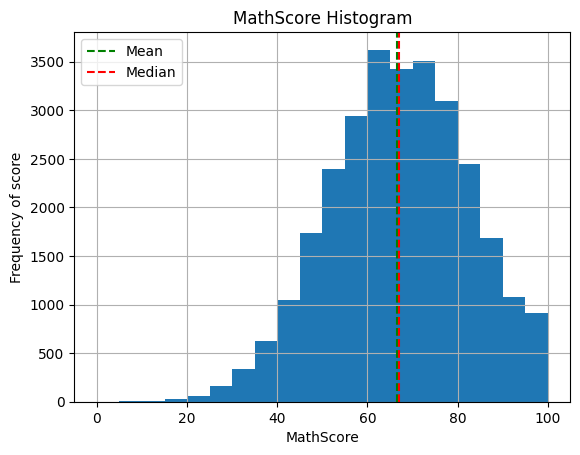

In [5]:
plt.hist(student_data.MathScore, bins=20)
plt.axvline(student_data.MathScore.mean(), color="green", ls="--", label="Mean")
plt.axvline(student_data.MathScore.median(), color="red", ls="--", label = "Median")
plt.xlabel("MathScore")
plt.ylabel("Frequency of score")
plt.title("MathScore Histogram")
plt.grid()
plt.legend(loc="upper left")
plt.show()

3. a) Make a pie chart of the feature NrSiblings. <br>
   b) Display the labels for each wedge. <br>
   c) Display the percentages within edge wedge. <br>
   d) Title the figure "NrSiblings pie chart".

In [7]:
student_data.isna().sum()

Gender                    0
EthnicGroup               0
ParentEduc                0
LunchType                 0
TestPrep                  0
ParentMaritalStatus       0
PracticeSport             0
IsFirstChild              0
NrSiblings                0
TransportMeans            0
WklyStudyHours            0
MathScore                 0
ReadingScore              0
WritingScore              0
Gender_female             0
Gender_male               0
LunchType_free/reduced    0
LunchType_standard        0
dtype: int64

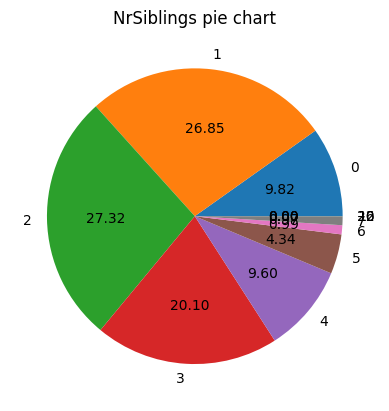

In [8]:
count_per_nrsiblings = student_data.groupby("NrSiblings").count().loc[:,"Gender"].values
nrsiblings_label=student_data.groupby("NrSiblings").count().index.values.astype(int)
plt.pie(count_per_nrsiblings, labels=nrsiblings_label, autopct="%.2f")
plt.title("NrSiblings pie chart")
plt.show()

4. a) Create a bar chart of the average ReadingScore for each ParentEduc group. <br>
   b) Color each bar in a different color. Set the transparency of the bars to 0.7 <br>
   c) Calculate the standard deviation of the ReadingScore and add a vertical errorbar to the bar tips.

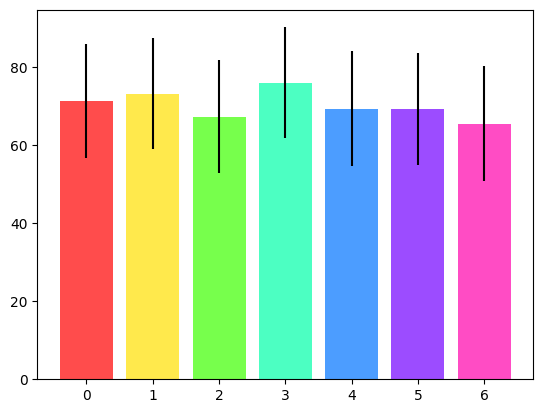

In [14]:
parent_educ_values = sorted(student_data["ParentEduc"].unique())
readingscore_per_pe = []
readingscore_per_pe_std = []
for pe_value in parent_educ_values:
    mask = (student_data["ParentEduc"]==pe_value)
    readingscore_per_pe.append(student_data.loc[mask, 'ReadingScore'].mean())
    readingscore_per_pe_std.append(student_data.loc[mask, 'ReadingScore'].std())
colors =plt.cm.hsv(np.linspace(0,0.9,len(parent_educ_values)))
plt.bar(parent_educ_values, readingscore_per_pe, color=colors, alpha=0.7, yerr=readingscore_per_pe_std)
plt.show()

5. a) Make a figure divided into 2 rows and 2 columns. Set the figure size to 30 by 30. <br>
   b) In the top left axis:
       1) Draw a line graph of the students' MathScores in descending order.
       2) Color the span on the x axis for which the students' MathScores are less than 50 in red. Set transparency to 0.3.
   c) In the top right axis:
       1) Draw a scatter plot of MathScore vs ReadingScore. 
       2) Make the bubbles representing the female students yellow and the ones representing the male students purple. Add and display labels. Set transparency to 0.1.
       3) Set the size of the bubbles to be 50*NrSiblings.
   d) In the bottom left axis:
       1) Draw a boxplot of the WrittingScore feature values.
       2) Remove fliers from the boxplot.
   e) In the borrom right axis:
       1) Draw a bar plot of the number of students using each transportation method.
       2) Make the bar plot stacked by coloring the part of the bar representing the number of students which are first ch-ildren in red and the ones who arent in blue. Add and display labels.

In [16]:
def find_first_less_than_value(arr, target):
    for i, val in enumerate(arr):
        if val < target:
            return i
    return -1

In [9]:
student_data.TransportMeans.unique()

array([1, 0, 2], dtype=int64)

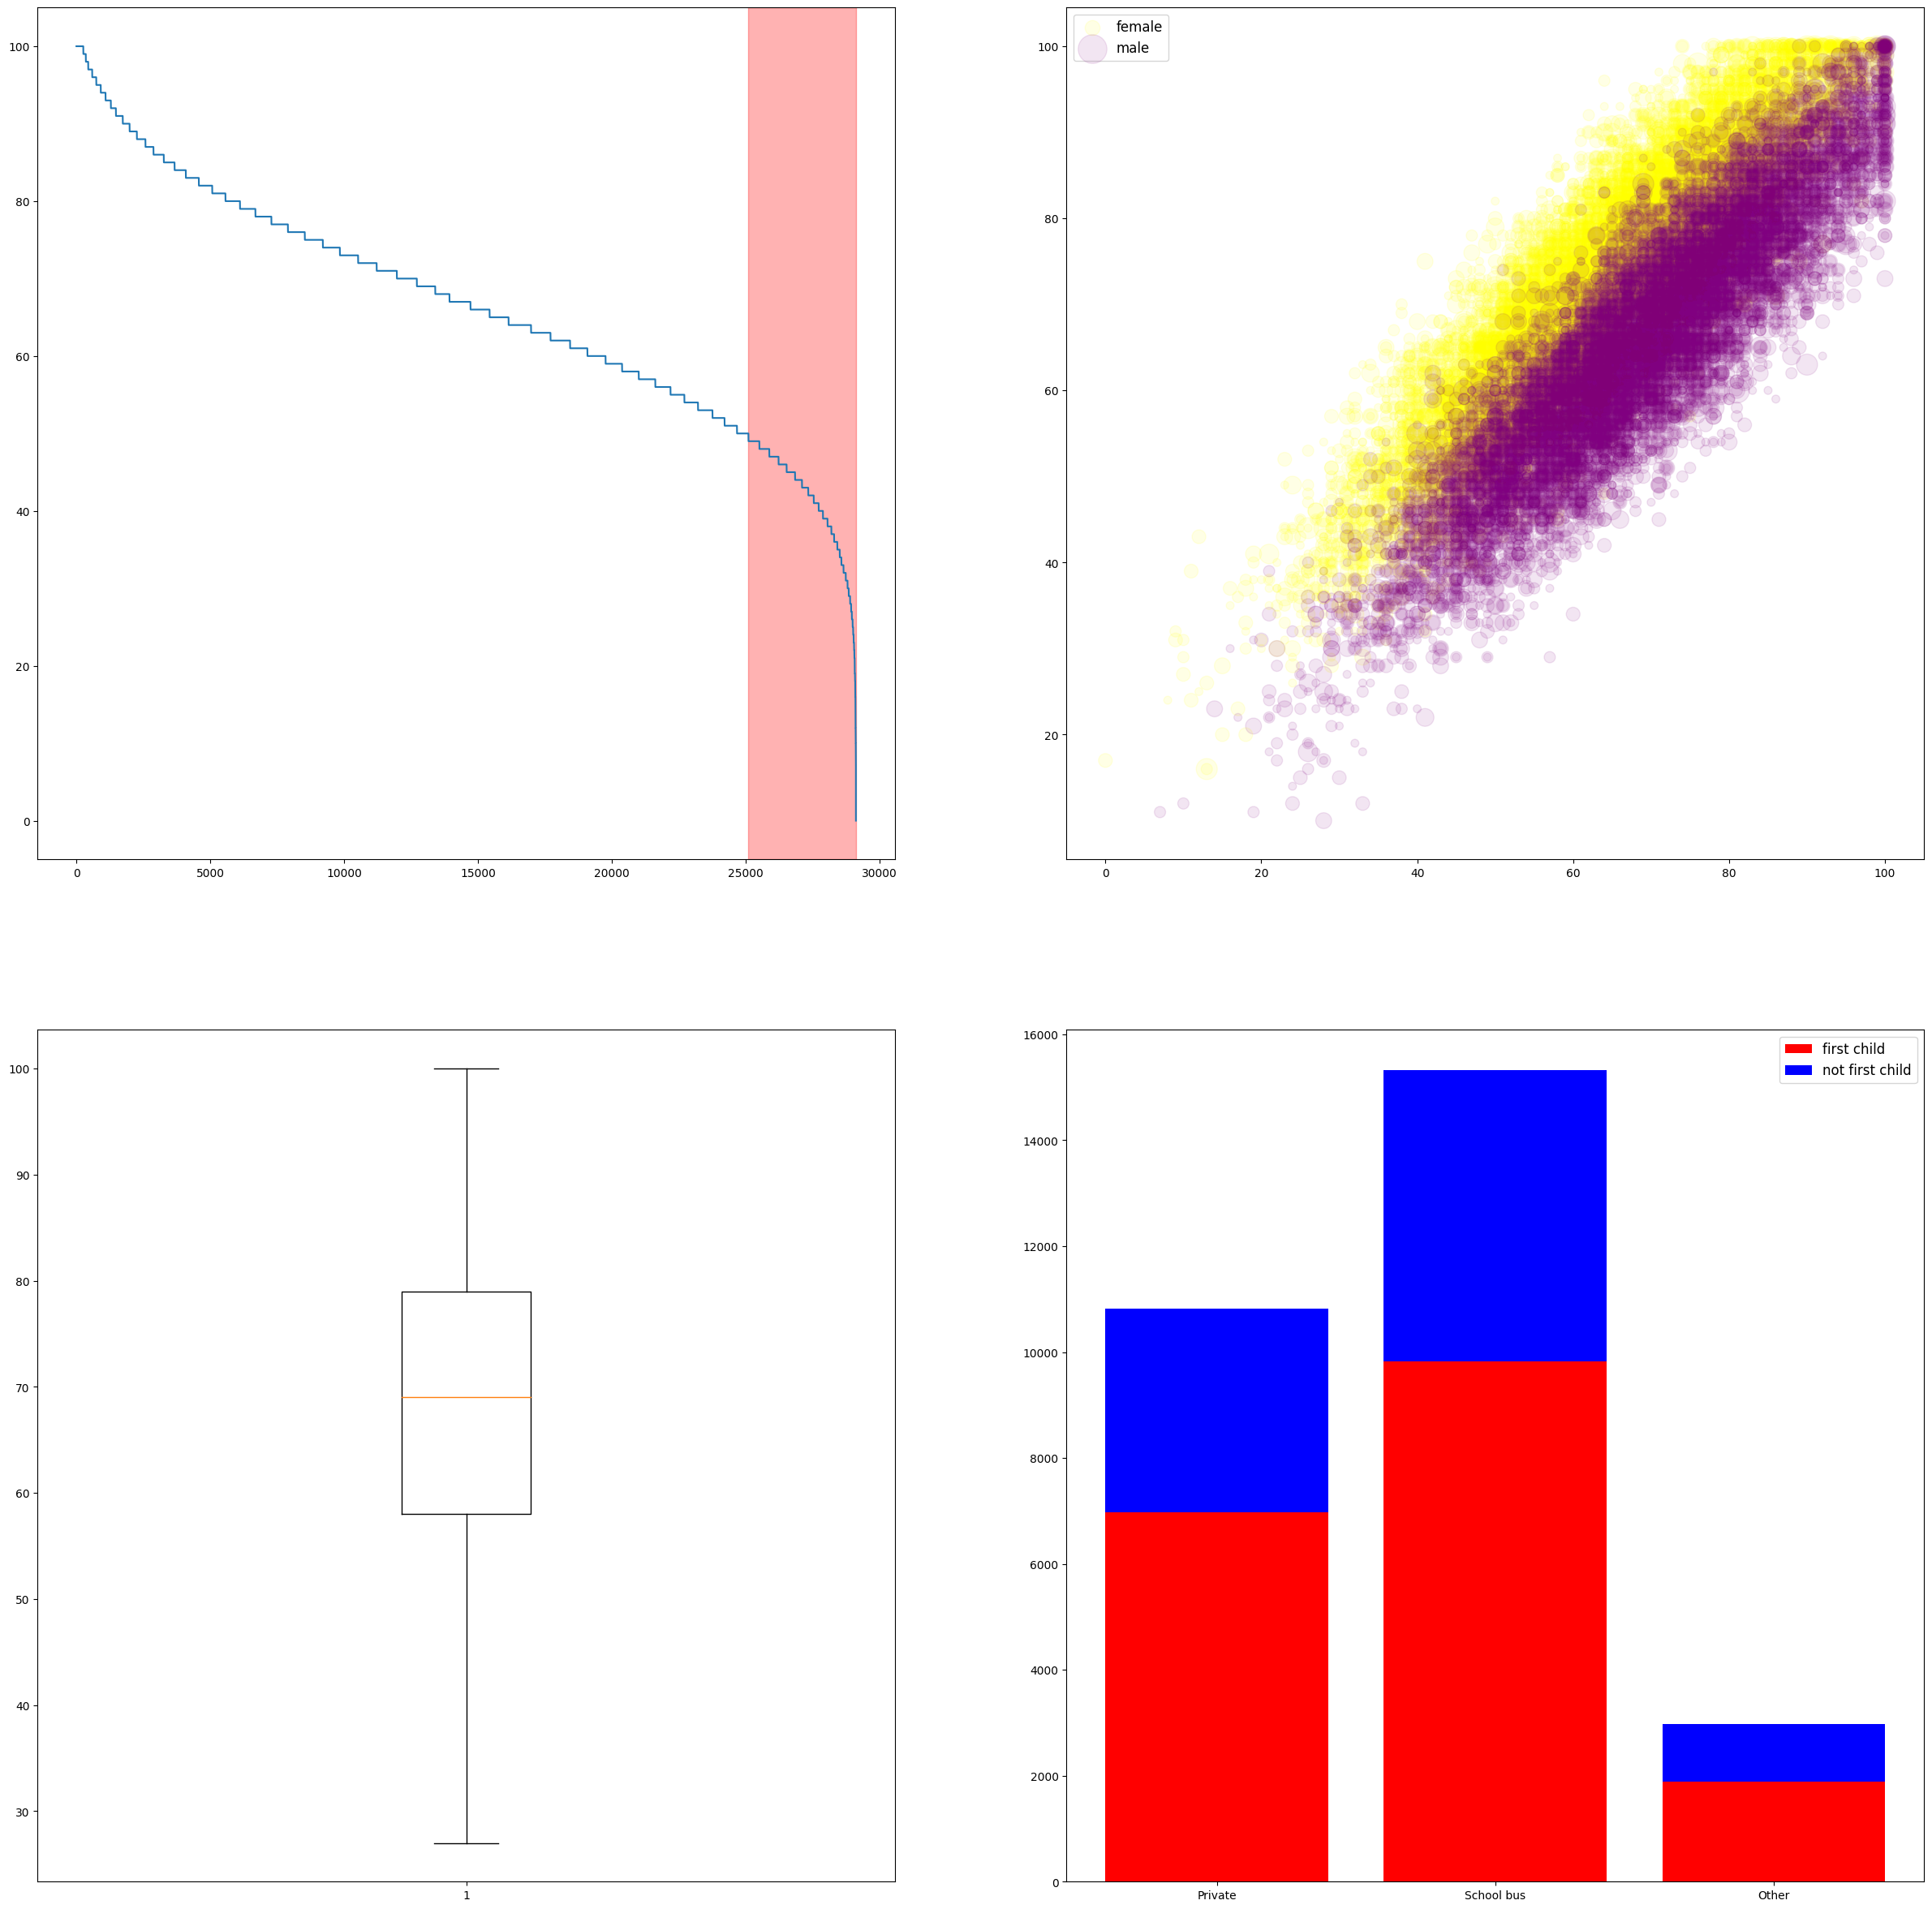

In [19]:
fig, ax = plt.subplots(2,2, figsize=(30,30))

sorted_mathscores=student_data.sort_values(by=["MathScore"], ascending=False).MathScore
person = [x for x in range(len(sorted_mathscores))]
ax[0,0].plot(person, sorted_mathscores)
ax[0,0].axvspan(find_first_less_than_value(sorted_mathscores,50), len(sorted_mathscores), color="r", alpha=0.3)
#below_50 = sorted_mathscores < 50
#ax[0, 0].fill_between(np.arange(len(sorted_mathscores)), 0, sorted_mathscores, where=below_50, color='red', alpha=0.3)

mask_female = (student_data.Gender == "female")
sizes = student_data.NrSiblings*50
ax[0,1].scatter(student_data.loc[mask_female, "MathScore"], student_data.loc[mask_female, "ReadingScore"], s=sizes[mask_female], c="yellow", label="female", alpha=0.1)
ax[0,1].scatter(student_data.loc[~mask_female, "MathScore"], student_data.loc[~mask_female, "ReadingScore"], s=sizes[~mask_female], c="purple", label="male", alpha=0.1)
ax[0,1].legend(loc="best", fontsize="large")

ax[1,0].boxplot(student_data.WritingScore, showfliers=False)

mask_first_child = (student_data.IsFirstChild == 1)
count_per_transport_first = student_data.loc[mask_first_child, :].groupby("TransportMeans").count().loc[:,"Gender"].values
count_per_transport_notfirst = student_data.loc[~mask_first_child, :].groupby("TransportMeans").count().loc[:,"Gender"].values
title_name=("Private", "School bus", "Other") #order based on LabelEncoder pairings from previous exercise
ax[1,1].bar(title_name, count_per_transport_first, color="red", label="first child")
ax[1,1].bar(title_name, count_per_transport_notfirst, color="blue", label="not first child", bottom=count_per_transport_first)
ax[1,1].legend(loc="best", fontsize="large")

plt.show()

6. a) Using seaborn, display a heatmap of the correlation coefficients between the numeric features. <br>
   b) Set the figure size to 20 by 10. <br>
   b) Make the heatmap display 2 decimal places of the values of the correlation coefficients. <br>
   c) Use the "icefire" colormap.

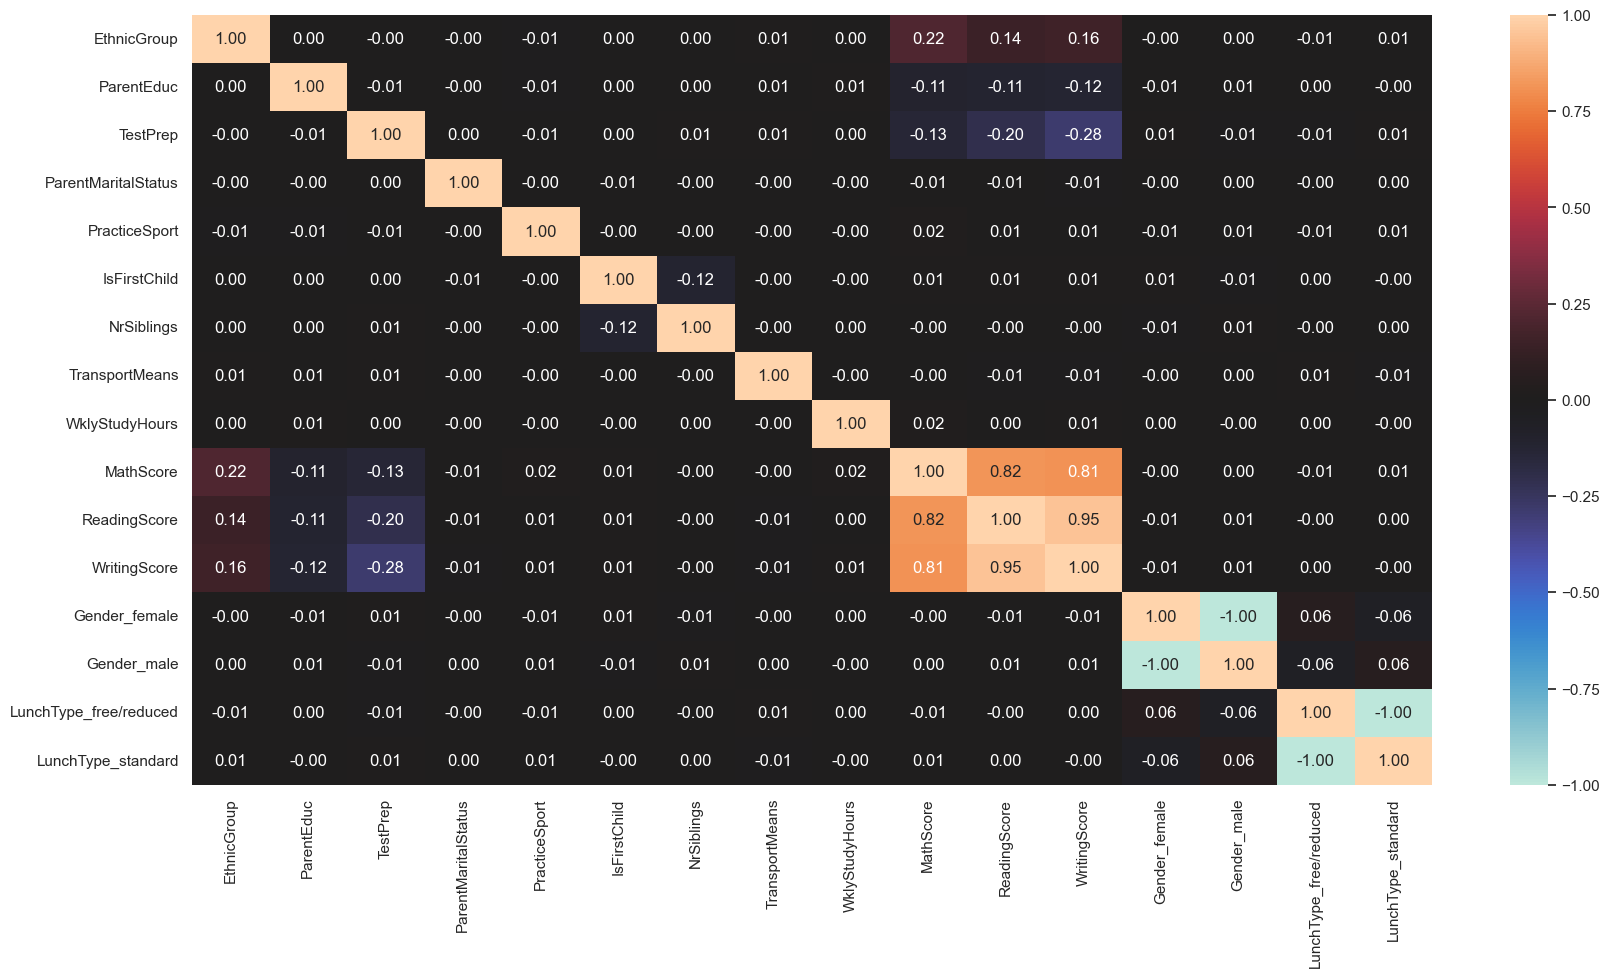

In [20]:
student_data_numeric = student_data.loc[:, ~student_data.columns.isin(["Gender", "LunchType"])] 
#Label Encoded and OneHot Encoded features are taken as numeric,
#alternatively student_data.loc[:,student_data.columns.isin(["NrSiblings", "MathScore", "ReadingScore", "WritingScore"])]
#could have been used for features numeric from the start. However, the exact result of this hypothetical procedure is simply
#a subset of the heatmap that follows.
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(student_data_numeric.corr(), annot=True, fmt=".2f", cmap="icefire")
plt.show()

7. a) Make a scatterplot matrix of all the features. <br>
   b) Remove mirroring scatter plots. <br>
   c) Hue the plot by gender.

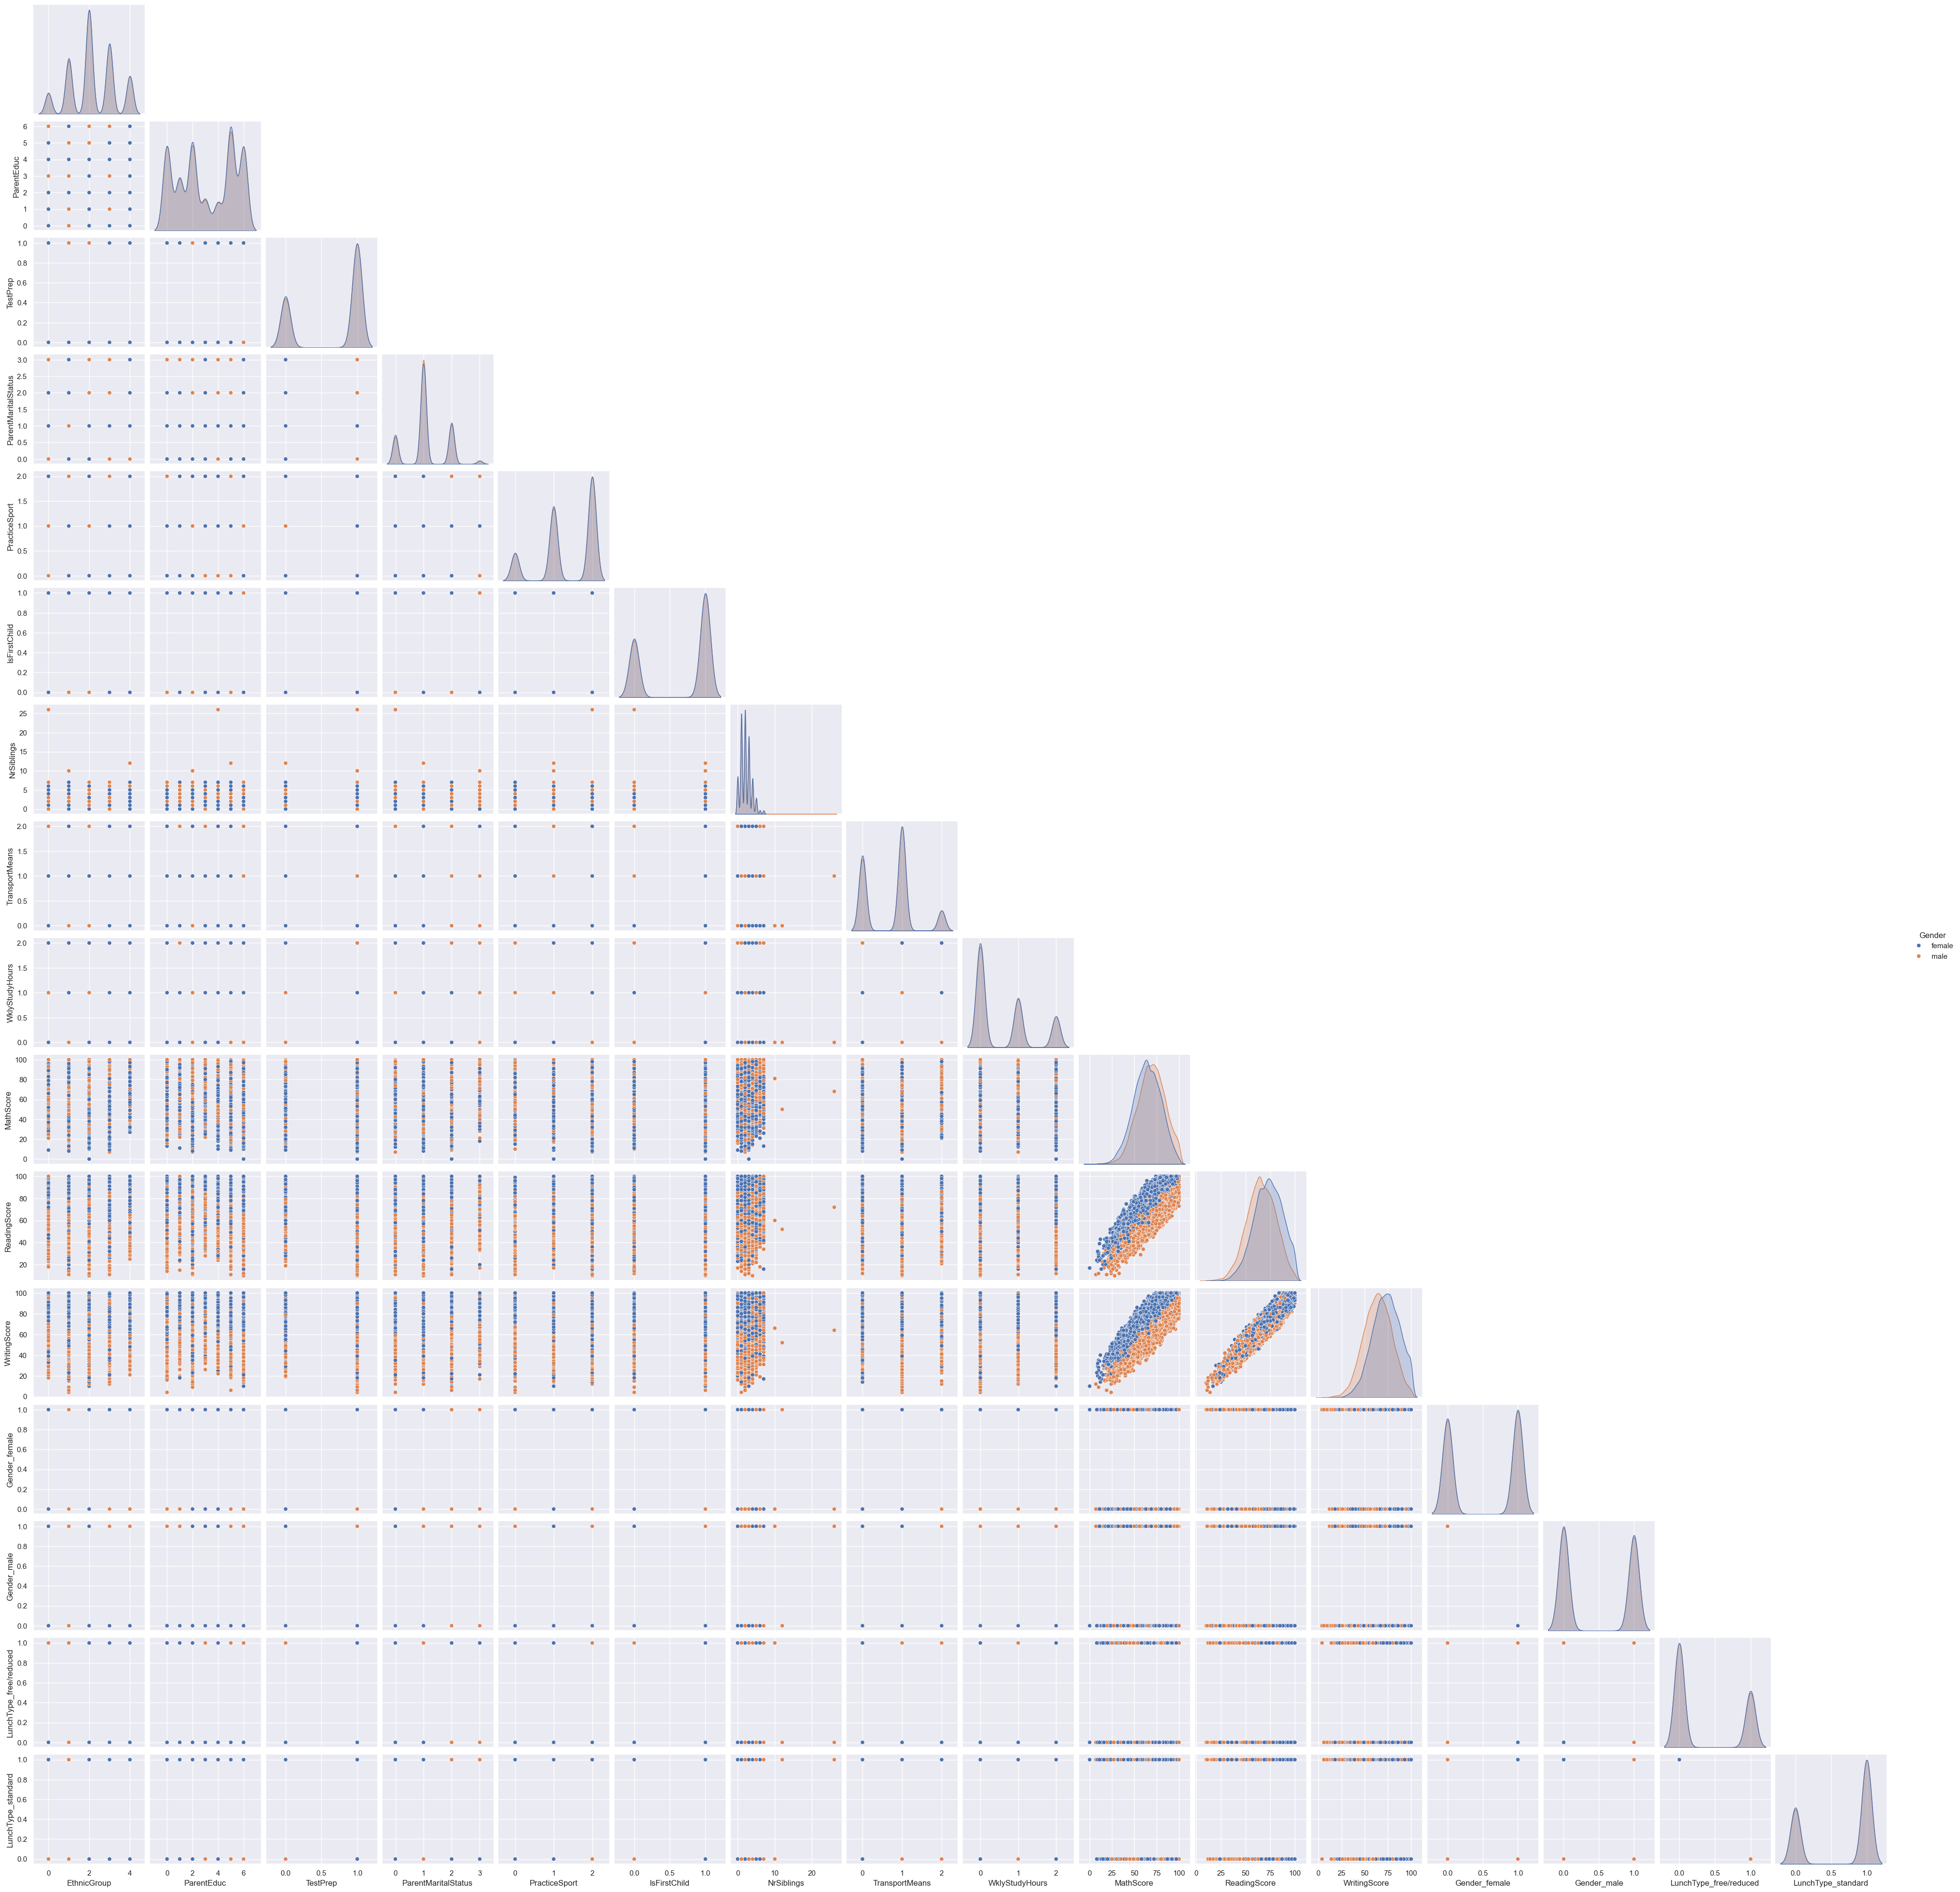

In [19]:
sns.set(rc={'figure.figsize':(20,10)})
sns.pairplot(student_data, hue="Gender", corner=True)
plt.show()